# Multi-Layer Neural Networks

In [4]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

from neural_net import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prepare Dataset

In [12]:
target_dir = "Week 4/Deep Neural Network Application_ Image Classification/datasets"
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(dir=target_dir)

In [13]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [14]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255
test_x = test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## Two-Layer Neural Network

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354664
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943324
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203889
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.27491377282130197
Cost after iteration 1300: 0.24681768210614827
Cost after iteration 1400: 0.19850735037466102
Cost after iteration 1500: 0.1744831811255664
Cost after iteration 1600: 0.17080762978096403
Cost after iteration 1700: 0.11306524562164721
Cost after iteration 1800: 0.09629426845937147
Cost after iteration 1900: 0.08342617959726861
Cost after iteration 2000: 0.0743907870431908
Cost after iteration 2100: 0.06630748132

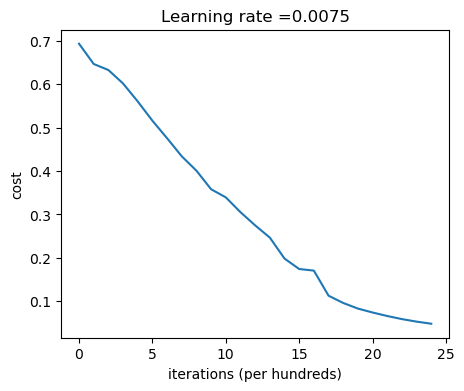

Accuracy: 0.9999999999999998
Accuracy: 0.72


In [11]:
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plot_costs(costs, learning_rate)

predictions_train = predict(train_x, train_y, parameters)
predictions_test = predict(test_x, test_y, parameters)

## L-Layer Neural Network

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822918
Cost after iteration 200: 0.6482632048575216
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366112
Cost after iteration 500: 0.5401376634547802
Cost after iteration 600: 0.5279299569455271
Cost after iteration 700: 0.46547737717668486
Cost after iteration 800: 0.36912585249592783
Cost after iteration 900: 0.39174697434805333
Cost after iteration 1000: 0.3151869888600614
Cost after iteration 1100: 0.27269984417893844
Cost after iteration 1200: 0.23741853400268118
Cost after iteration 1300: 0.19960120532208628
Cost after iteration 1400: 0.189263003884633
Cost after iteration 1500: 0.16118854665827767
Cost after iteration 1600: 0.14821389662363324
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.12974017549190134
Cost after iteration 1900: 0.12122535068005211
Cost after iteration 2000: 0.1138206066863372
Cost after iteration 2100: 0.1078392

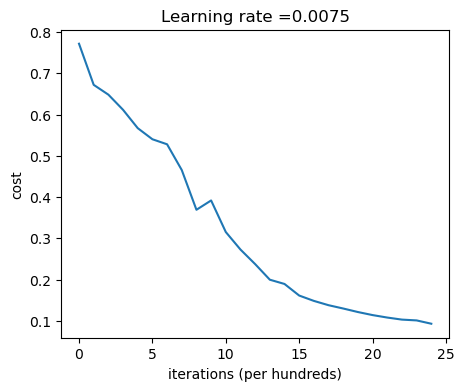

Accuracy: 0.9856459330143539
Accuracy: 0.8


In [16]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)
plot_costs(costs, learning_rate)

pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)